# SpaceX Falcon 9 Exploratory Data Analysis

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Prepare full_path for the data source
filename = "dataset_part_2.csv"
# Read the airline data into pandas dataframe
df = pd.read_csv(filename)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

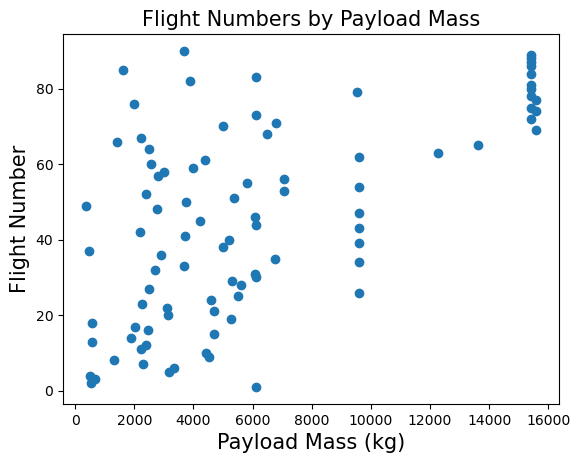

In [8]:
#sns.catplot(x="PayloadMass", y="FlightNumber", hue="Class", data=df, aspect = 5)
x=df['PayloadMass']
y=df['FlightNumber']
plt.scatter(x,y)
plt.xlabel('Payload Mass (kg)',fontsize=15)
plt.ylabel('Flight Number',fontsize=15)
plt.title('Flight Numbers by Payload Mass',fontsize=15)
plt.show()

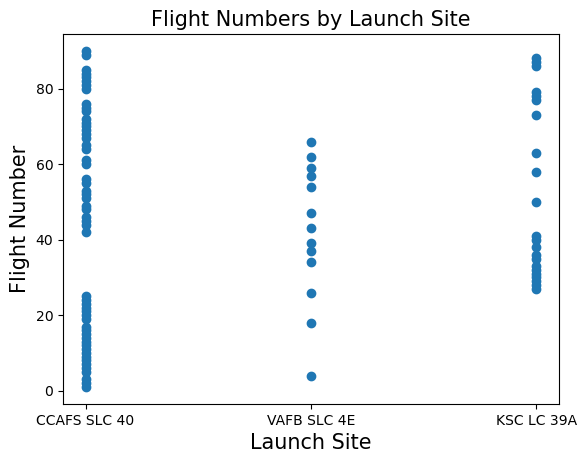

In [9]:
plt.scatter(x=df['LaunchSite'],y=df['FlightNumber'])
plt.xlabel('Launch Site',fontsize=15)
plt.ylabel('Flight Number',fontsize=15)
plt.title('Flight Numbers by Launch Site',fontsize=15)
plt.show()

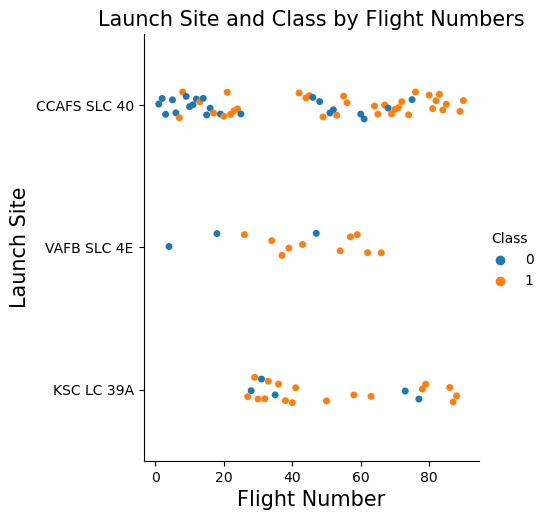

In [10]:
#TASK 1: Visualize the relationship between Flight Number and Launch Site
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='FlightNumber', hue='Class', data=df)
plt.xlabel('Flight Number',fontsize=15)
plt.ylabel('Launch Site',fontsize=15)
plt.title('Launch Site and Class by Flight Numbers',fontsize=15)
plt.show()

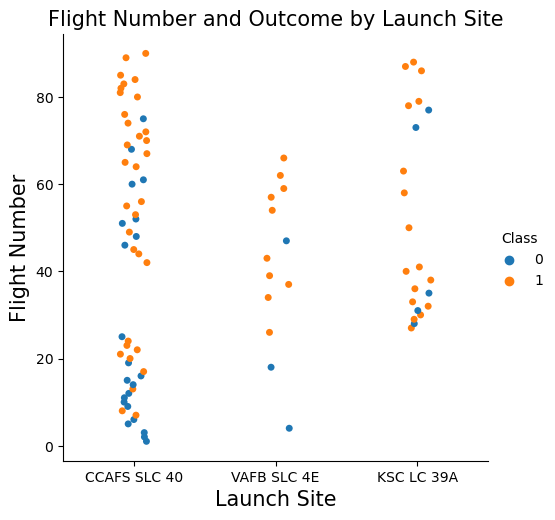

In [11]:
#TASK 1: Visualize the relationship between Flight Number and Launch Site
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(x='LaunchSite', y='FlightNumber', hue='Class', data=df)
plt.ylabel('Flight Number',fontsize=15)
plt.xlabel('Launch Site',fontsize=15)
plt.title('Flight Number and Outcome by Launch Site',fontsize=15)
plt.show()

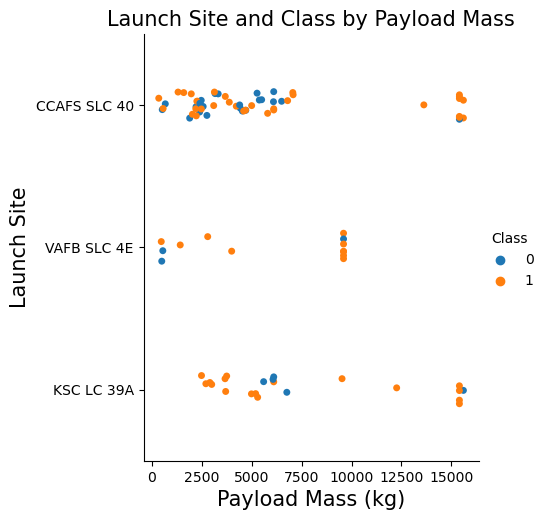

In [12]:
#TASK 2: Visualize the relationship between Payload and Launch Site
#We also want to observe if there is any relationship between launch sites and their payload mass.

# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y='LaunchSite', x='PayloadMass', hue='Class', data=df)
plt.xlabel('Payload Mass (kg)',fontsize=15)
plt.ylabel('Launch Site',fontsize=15)
plt.title('Launch Site and Class by Payload Mass',fontsize=15)
plt.show()

C:\Users\serge\AppData\Local\Temp\ipykernel_14744\3369240706.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sorted = df.groupby('Orbit').mean()['Class']\


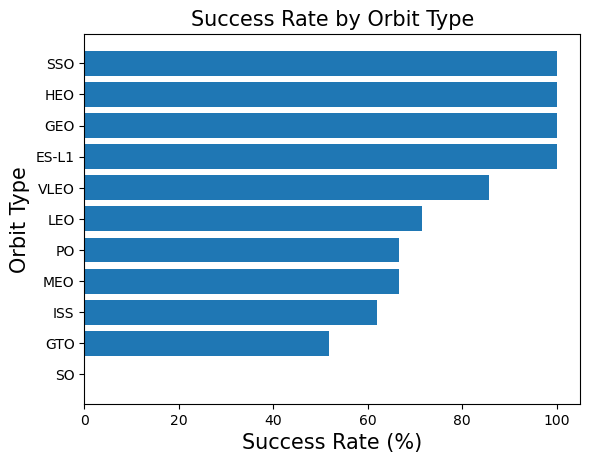

In [13]:
#TASK 3: Visualize the relationship between success rate of each orbit type
#Next, we want to visually check if there are any relationship between success rate and orbit type.

#Let's create a bar chart for the sucess rate of each orbit

# HINT use groupby method on Orbit column and get the mean of Class column
df_sorted = df.groupby('Orbit').mean()['Class']\
    .reset_index().sort_values(['Class'], ascending=True)

fig, ax = plt.subplots()

ax.barh(df_sorted.Orbit, df_sorted.Class * 100)

plt.xlabel('Success Rate (%)',fontsize=15)
plt.ylabel('Orbit Type',fontsize=15)
plt.title('Success Rate by Orbit Type',fontsize=15)
plt.show()

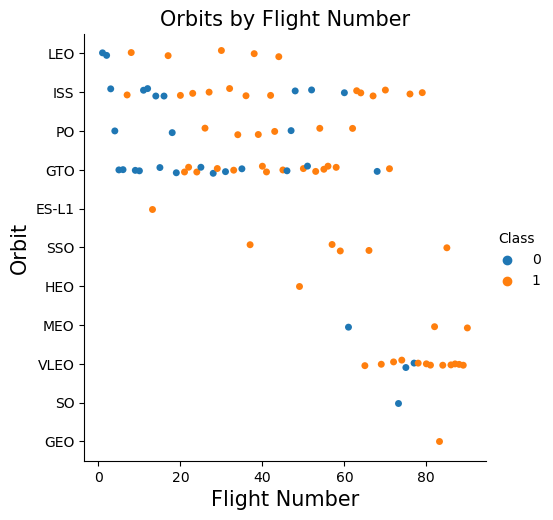

In [14]:
#TASK 4: Visualize the relationship between FlightNumber and Orbit type
#For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y='Orbit', x='FlightNumber', hue='Class', data=df)
plt.xlabel('Flight Number',fontsize=15)
plt.ylabel('Orbit',fontsize=15)
plt.title('Orbits by Flight Number',fontsize=15)
plt.show()

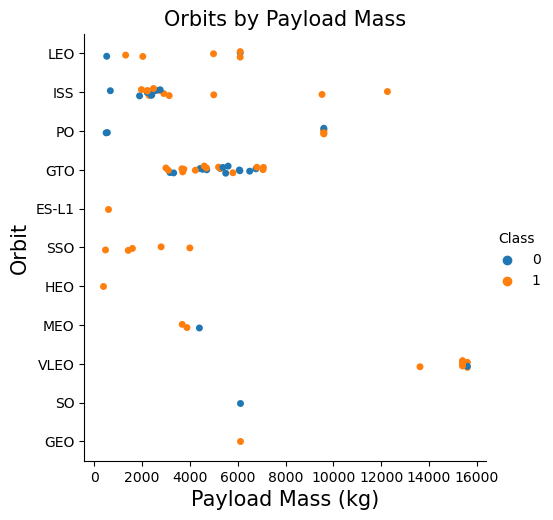

In [15]:
#TASK 5: Visualize the relationship between Payload and Orbit type
#Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(x='PayloadMass', y='Orbit', hue='Class', data=df)
plt.xlabel('Payload Mass (kg)',fontsize=15)
plt.ylabel('Orbit',fontsize=15)
plt.title('Orbits by Payload Mass',fontsize=15)
plt.show()

C:\Users\serge\AppData\Local\Temp\ipykernel_14744\879128748.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(Extract_year(df['Date'])).mean()['Class'].plot(kind='line')


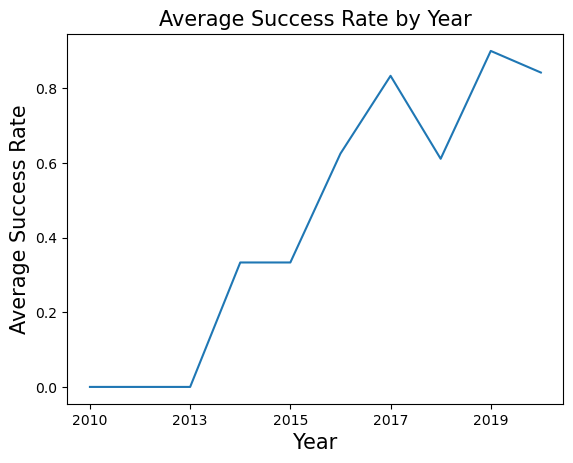

In [16]:
#TASK 6: Visualize the launch success yearly trend
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df.groupby(Extract_year(df['Date'])).mean()['Class'].plot(kind='line')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average Success Rate',fontsize=15)
plt.title('Average Success Rate by Year',fontsize=15)
plt.show()

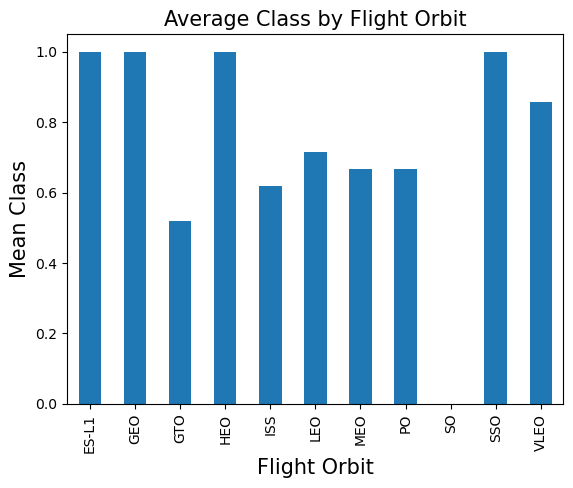

In [17]:
df.groupby('Orbit')['Class'].mean().plot.bar()
plt.xlabel('Flight Orbit',fontsize=15)
plt.ylabel('Mean Class',fontsize=15)
plt.title('Average Class by Flight Orbit',fontsize=15)
plt.show()

In [21]:
max_payload = df['PayloadMass'].max()
min_payload = df['PayloadMass'].min()
print('Min Payload: ',min_payload)
print('Max Payload: ',max_payload)

Min Payload:  350.0
Max Payload:  15600.0


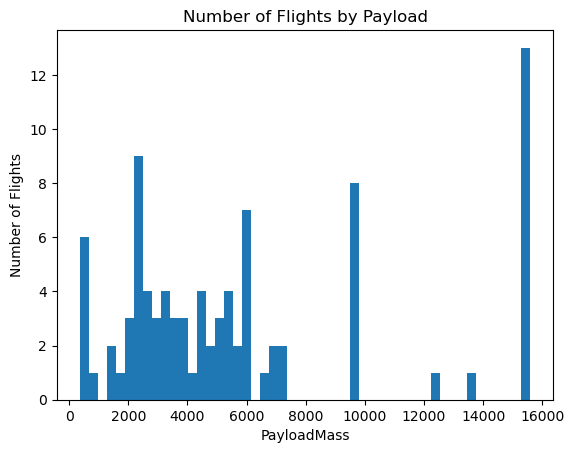

In [23]:
plt.hist(df['PayloadMass'], bins = 50)
plt.xlabel('PayloadMass')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Payload')
plt.show()

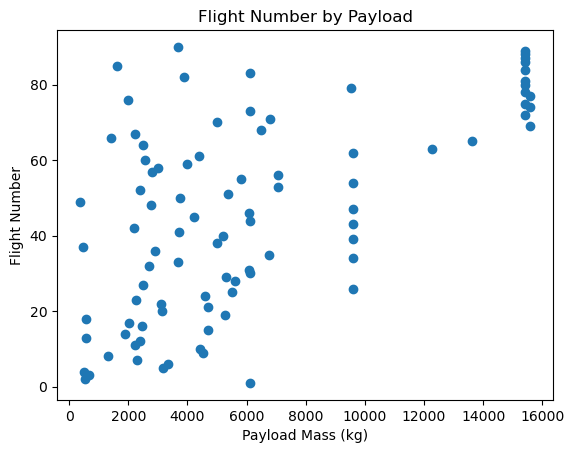

In [25]:
x = df['PayloadMass']
y = df['FlightNumber']
plt.scatter(x,y)
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Flight Number')
plt.title('Flight Number by Payload')
plt.show()

In [26]:
#Features Engineering
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [37]:
sites = df.LaunchSite.unique()
sites
print('Launch site Names: ')
for name in sites:
    print(name)

Launch site Names: 
CCAFS SLC 40
VAFB SLC 4E
KSC LC 39A


In [31]:
#TASK 7: Create dummy variables to categorical columns
#Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
